# Importing Modules

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
data = pd.read_csv('data/churn.csv')

In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Preprocessing

In [4]:
data.churn.unique()

array([False,  True])

In [5]:
mapping = {False:0, True:1}
data.churn = data.churn.map(mapping)

In [22]:
data[data.churn == 1]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,...,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [26]:
data.churn[:11]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
Name: churn, dtype: int64

In [6]:
data['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
data['international plan'] = data['international plan'].map({'no':0, 'yes':1})

In [8]:
data['international plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: international plan, dtype: int64

In [9]:
data['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
data['voice mail plan'] = data['voice mail plan'].map({'yes':1, 'no':0})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
c

In [12]:
data.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
states = []
for i in data.state.unique():
    states.append(i)
data.state = pd.Categorical(data.state, states).codes

In [17]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,3,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null int8
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
cus

In [20]:
data.isnull().sum()/len(data)

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

In [28]:
X = data.drop(['churn', 'phone number'], axis=1)
y = data.churn

## Standardisation



In [29]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.64711246,  0.67648946, -0.52360328, -0.32758048,  1.6170861 ,
         1.23488274,  1.56676695,  0.47664315,  1.56703625, -0.07060962,
        -0.05594035, -0.07042665,  0.86674322, -0.46549436,  0.86602851,
        -0.08500823, -0.60119509, -0.0856905 , -0.42793202],
       [-1.57924383,  0.14906505, -0.52360328, -0.32758048,  1.6170861 ,
         1.30794844, -0.33373776,  1.12450284, -0.33401297, -0.10808036,
         0.14486653, -0.10754944,  1.05857074,  0.14782467,  1.05938994,
         1.24048169, -0.60119509,  1.2411686 , -0.42793202],
       [-1.5113752 ,  0.9025285 , -0.52360328, -0.32758048, -0.61839626,
        -0.59175986,  1.16830364,  0.67598459,  1.168464  , -1.57338336,
         0.49627857, -1.57389963, -0.75686906,  0.19893459, -0.75557074,
         0.70312091,  0.21153386,  0.69715637, -1.1882185 ],
       [-1.57924383, -0.42859027, -0.68883427,  3.05268496, -0.61839626,
        -0.59175986,  2.19659605, -1.46693591,  2.19675881, -2.74286476,
        -0.608

# Train/Test dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)

In [33]:
X_train.shape, y_train.shape

((2333, 19), (2333,))

In [34]:
X_test.shape, y_test.shape

((1000, 19), (1000,))

# Modeling (Logistic Regression with Scikit-learn)

Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

**Predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [43]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.73636761, 0.26363239],
       [0.64573954, 0.35426046],
       [0.87071711, 0.12928289],
       ...,
       [0.85183074, 0.14816926],
       [0.803314  , 0.196686  ],
       [0.73975637, 0.26024363]])

In [48]:
yhat_prob[0][0]

0.7363676075224823

# Evaluation

## Jaccard index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [50]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.846

# Confusion matrix

Another way of looking at accuracy of classifier is to look at confusion matrix.

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 20 142]
 [ 12 826]]


Confusion matrix, without normalization
[[ 20 142]
 [ 12 826]]


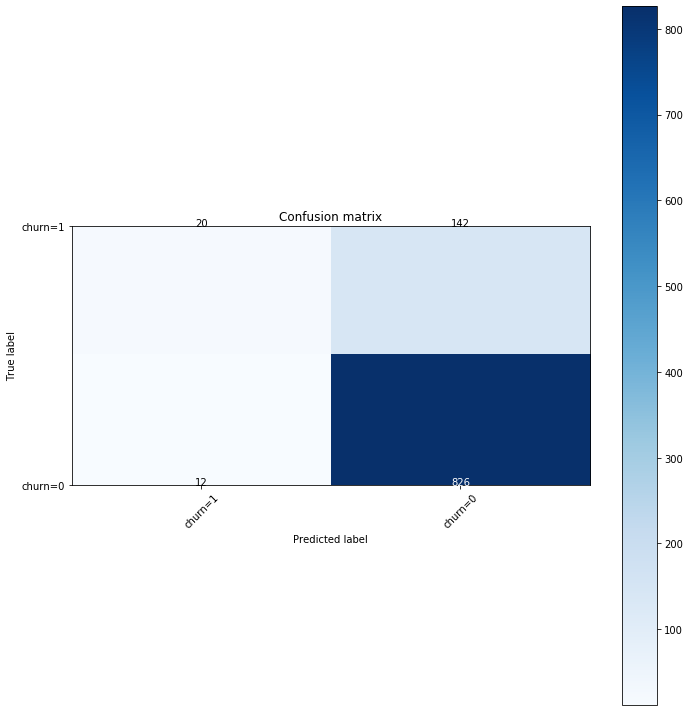

In [53]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [54]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       838
           1       0.62      0.12      0.21       162

    accuracy                           0.85      1000
   macro avg       0.74      0.55      0.56      1000
weighted avg       0.82      0.85      0.80      1000



Based on the count of each section, we can calculate precision and recall of each label:

- Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)
- Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

<b>F1 score</b>: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our

# log loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [55]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3697815065391554